## License Information
---

This file is distributed as part of _swprocess_, a Python package for surface wave processing.

    Copyright (C) 2020 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _swprocess_ and this notebook
---

_swprocess_ is a Python package for surface wave processing. _swprocess_ was developed by
Joseph P. Vantassel under the supervision of Professor Brady R. Cox at The University of
Texas at Austin.

If you use _swprocess_ in your research or consulting, we ask you please cite the following:

> Vantassel, J. P. (2021). jpvantassel/swprocess: latest (Concept). Zenodo.
> [https://doi.org/10.5281/zenodo.4584128](https://doi.org/10.5281/zenodo.4584128)

> Vantassel, J. P. & Cox, B. R. (2022). "SWprocess: a workflow for developing robust
> estimates of surface wave dispersion uncertainty". Journal of Seismology.
> [https://doi.org/10.1007/s10950-021-10035-y](https://doi.org/10.1007/s10950-021-10035-y)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for _swprocess_, please use the citation tool on the _swprocess_
[archive](https://doi.org/10.5281/zenodo.4584128)._

The data presented in this notebook is from the WGHS site in Wellington, NZ. The data
has been archived and made publically on the DesignSafe-CI by Cox and Vantassel (2018),
full citation and link to the data below.

> Cox, B. R. & Vantssel, J. P. (2018). Dynamic Characterization of Wellington, New Zealand
> [Dataset]. DesignSafe-CI [publisher]. https://doi.org/10.17603/DS24M6J

The raw wavefield records from the WGHS site were processed using the Rayleigh three-component
beaformer (RTBF) technique developed by Wathelet et al. (2018). The RTBF has been implemented and
been made publically available through the open-source software package Geopsy (Wathelet et al., 2020).

> Wathelet, M., Guillier, B., Roux, P., Cornou, C., & Ohrnberger, M. (2018). Rayleigh wave
> three-component beamforming: signed ellipticity assessment from high-resolution
> frequency-wavenumber processing of ambient vibration arrays. Geophysical Journal International
> 215, 507–523. https://doi.org/10.1093/gji/ggy286

> Wathelet, M., Chatelain, J.-L., Cornou, C., Giulio, G.D., Guillier, B., Ohrnberger, M., &
> Savvaidis, A., 2020. Geopsy: A User-Friendly Open-Source Tool Set for Ambient Vibration
> Processing. Seismological Research Letters. https://doi.org/10.1785/0220190360

## Getting Started
---
1. Install _swprocess_ and its dependencies, with `pip install swprocess`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__ 
2. Execute the notebook to extract passive-wavefield data from the `.max` format, plot the imported data, and write the imported data into a `.json` file. Note the `.json` file(s) created by this notebook will be used later in the example notebook (`stats.ipynb`). __(~3 minutes)__
3. Repeat the process to load and save, both Rayleigh and Love wave dispersion data. __(~3 minutes)__
4. Use the notebook to load and manipulate the dispersion data for your next project.

Happy Processing!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import swprocess

## Input
---

### Files

In [2]:
# File(s) to import in the .max format produced using Geopsy and fk-style processing.
fnames_set = [
    ["./CUSSO_L60_HFK_Vert.max"],
    ]

#fnames_set = [["data/fk/nz_wghs_c50_rtbf-3c.max"],  # rayleigh & love
#              ["data/fk/nz_wghs_c50_fk-vt.max"],    # rayleigh only
#              ["data/fk/nz_wghs_c50_hfk-vt.max"],   # rayleigh only
#              ["data/fk/nz_wghs_bigx_rtbf-3c.max"], # rayleigh & love
#              ["data/fk/nz_wghs_bigx_fk-vt.max"],   # rayleigh only
#              ["data/fk/nz_wghs_bigx_hfk-vt.max"],  # rayleigh only
#              ]

### Wavetype

In [3]:
# Wavetype {"rayleigh", "love"}
wavetype = "rayleigh"

### Plot Settings

In [4]:
# Domains in which to plot the experimental dispersion data.
domains = [
    ["frequency", "velocity"],
    ["wavelength", "velocity"],
]

# Colors one per `fnames_set` entry. Examples include: "dodgerblue", "darkblue", "tomato", "pink", "limegreen", "darkorange".
# Colors may also be listed in hexidecimal.
colors = ["dodgerblue"]
#colors = ["dodgerblue", "darkblue", "tomato", "pink", "limegreen", "darkorange"]

# Custom labels one per `fanems_set` entry. Note these will also be used for the output file suffixs.
labels = ["L60_HFK"] 
#labels = ["c50-rtbf", "c50-fk", "c50-hfk", "bigx-rtbf", "bigx-fk", "bigx-hfk"]

## Plot Dispersion
---

Loading: ['./CUSSO_L60_HFK_Vert.max']


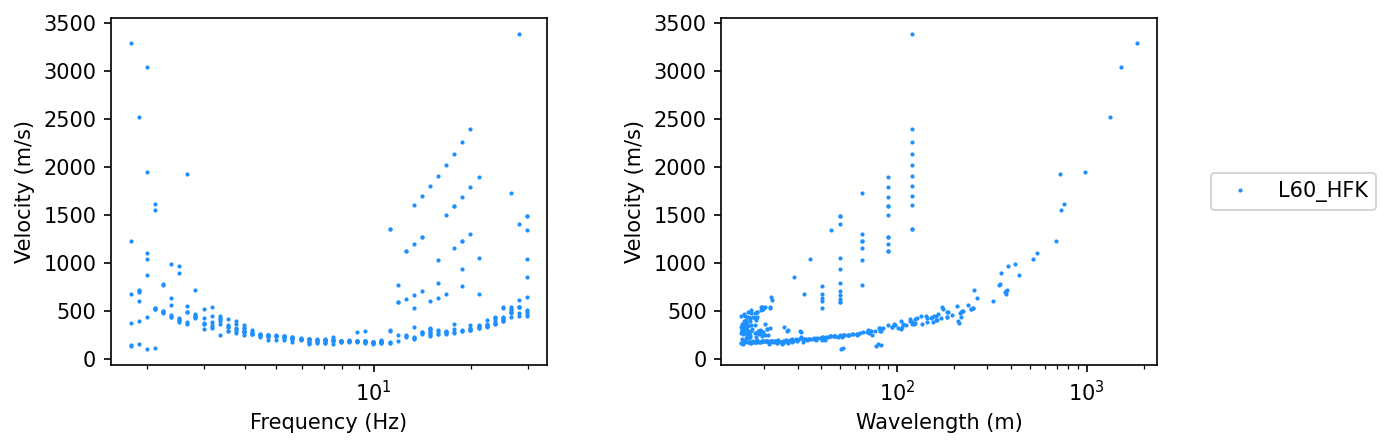

In [5]:
xtype = [x for x, _ in domains]
ytype = [y for _, y in domains]
fig, axs = plt.subplots(ncols=len(xtype), figsize=(9,3), dpi=150, gridspec_kw=dict(wspace=0.4))

if len(fnames_set) != len(colors) or len(fnames_set) != len(labels):
    raise IndexError(f"fnames_set, colors, and labels must be the same length.")

suites = []
for fnames, color, label in zip(fnames_set, colors, labels):
    print(f"Loading: {fnames}")
    peaksuite = swprocess.PeaksSuite.from_max(fnames=fnames, wavetype=wavetype)
    peaksuite.plot(xtype=xtype, ax=axs, ytype=ytype, plot_kwargs=dict(color=color, label=label))
    suites.append(peaksuite)
    
axs[-1].legend(bbox_to_anchor = (1.1, 0.5), loc="center left")

plt.show()

## Write to `.json`
---

In [7]:
output_fname_prefix = "CUSSO_MAM_raw_disp_data"

for label, suite in zip(labels, suites):
    suite.to_json(fname=f"{output_fname_prefix}_{wavetype}_{label}.json")